In [1]:
import numpy as np

import librosa
import librosa.display
import scipy.io.wavfile as wavfile
import scipy.signal as signal

import matplotlib.pyplot as plt
import seaborn as sns
import IPython
%matplotlib inline

In [42]:
def plot_audio(files, figcols, font_scale=1.0, dpi=100):
    """
        Takes list of audio file names as input (along with some plot settings)
        and plot spectrograms and waveforms.
    """
    fcount = len(files)
    figrows = int(np.ceil(fcount/figcols))*2

    # sns.set_style('whitegrid')
    sns.set_theme(context='paper', font_scale=font_scale)
    plt.rcParams['figure.dpi'] = dpi
    fig, ax = plt.subplots(figrows, figcols, figsize=(9*figcols,4*figrows))
    
    def plot(file, ax1, ax2):
        rate, data = wavfile.read(file)
        # spectrogram
        f, t, Sx = signal.spectrogram(data, fs=rate)
        d = 20*np.log10(Sx+1e-10)
        ax1.pcolormesh(t,f,d, vmin=-1e1,vmax=d.max(), 
                       rasterized=True, shading='gouraud')
        ax1.set_title(files[fn])
        ax1.set_xlabel('time')
        ax1.set_ylabel('frequency')
        # waveform
        norm_data = (data -data.mean())/data.std()
        ax2.plot(norm_data, lw=0.04)
        ax1.set_frame_on(False)
        #ax1.set_xticks([])
        #ax1.set_yticks([])
        #ax2.set_xticks([])
        #ax2.set_yticks([])
    
    fn = 0
    if figcols == 1:
        for r in range(0, figrows, 2):
            if fn < fcount: 
                plot(files[fn], ax[r], ax[r+1])
                fn += 1
                #continue
            ax[r].axis('off')
            ax[r+1].axis('off')
    else:
        for r in range(0, figrows, 2):
            for c in range(figcols):
                if fn < fcount:
                    plot(files[fn], ax[r,c], ax[r+1,c])
                    fn += 1
                    #continue
                ax[r,c].axis('off')
                ax[r+1,c].axis('off')
    
    plt.subplots_adjust(wspace = 0.05, hspace=0.05)

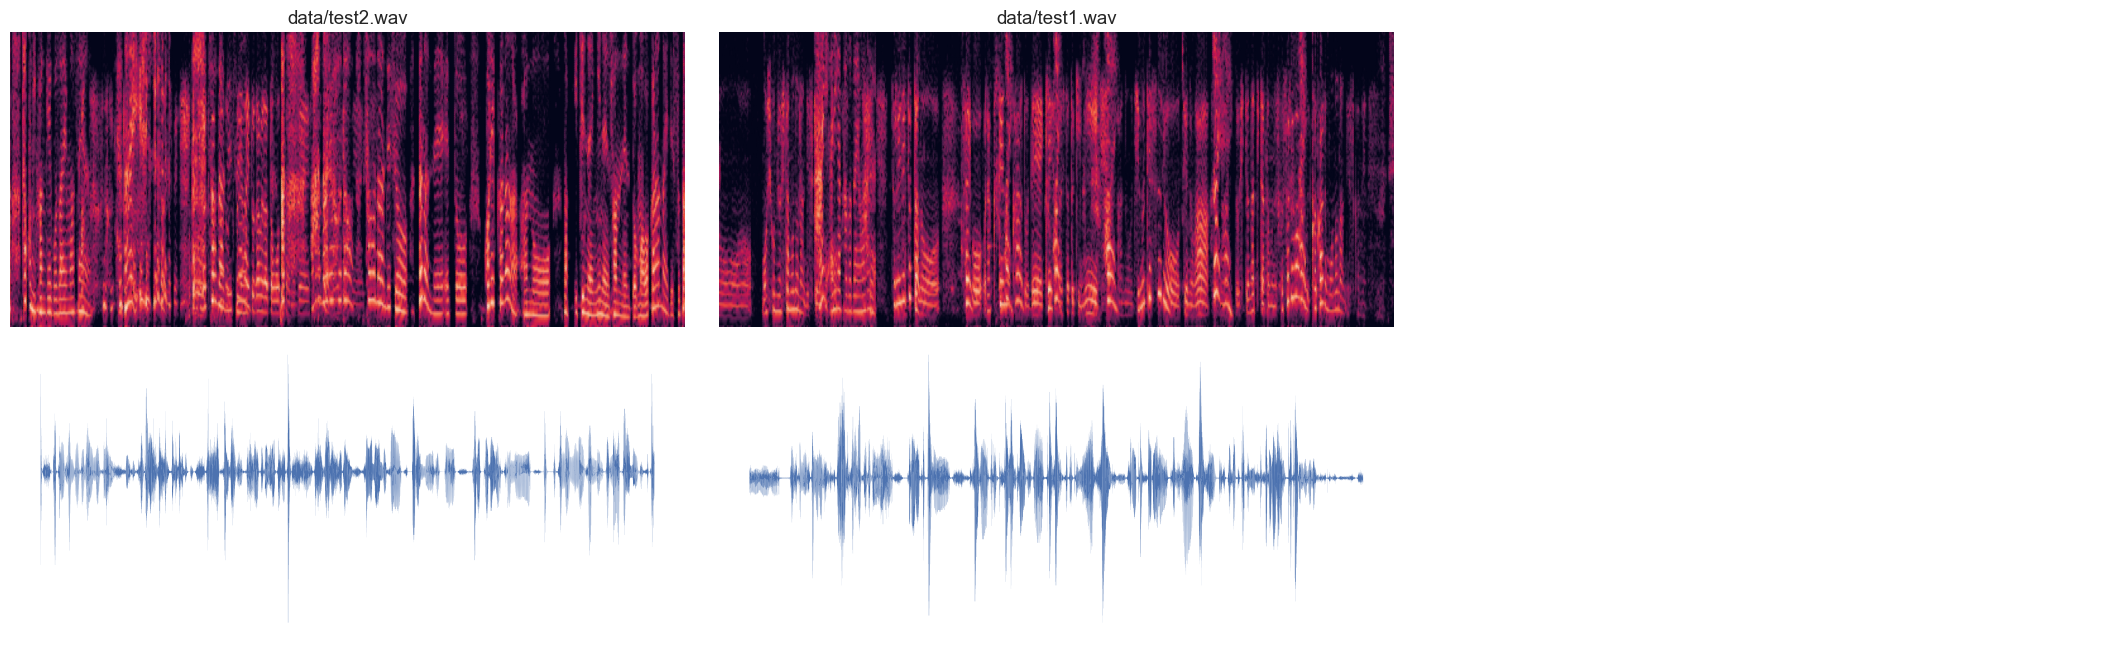

In [43]:
files = ['data/test2.wav', 'data/test1.wav']
plot_audio(files, 3, 1.4)

In [77]:
int(np.ceil(10/4))

3